In [1]:
import numpy as np
import os
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import io
from PIL import Image, ImageDraw
from io import BytesIO
import cv2
%matplotlib inline

In [5]:
limb_parents = [0, 0, 1, 2, 3, 1, 5, 6, 1, 0, 9, 10, 11, 0, 13, 14, 15]

In [17]:
def skeleton_image(joints_2d, img):
    img_copy = img.copy()
    colors = [(0,0,255), (0,255,0), (255,0,0), (255,0,255), (0,255,255), (255,255,0), (127,127,0), (0,127,0), (100,0,100), 
          (255,0,255), (0,255,0), (0,0,255), (255,255,0), (127,127,0), (100,0,100), (50, 255, 100), (50, 50, 0)]
    joints_2d = joints_2d
    for i in range(joints_2d.shape[0]):
        #         ax.text(joints_2d[i, 0], -joints_2d[i, 1], str(i))
        x_pair = [joints_2d[i, 0], joints_2d[limb_parents[i], 0]]
        y_pair = [joints_2d[i, 1], joints_2d[limb_parents[i], 1]]
        img_copy = cv2.line(img_copy, (int(x_pair[0]),int(y_pair[0])), (int(x_pair[1]),int(y_pair[1])), colors[i],4)

    return img_copy[:,:,::-1]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


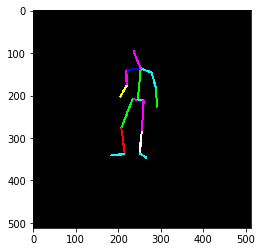

In [22]:
image_size = 512

pose_mat = 'poses_2d/HipHop_HipHop1_C0.mat'
poses_2d = sio.loadmat(pose_mat)['pose_2d']

img = np.zeros((image_size,image_size,3))
skltn_img = skeleton_image(poses_2d[0], img)
plt.imshow(skltn_img)